In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.layers import Conv1D,Input,Embedding,MaxPooling1D,GlobalMaxPooling1D,Dense
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [2]:
train=pd.read_csv('spam.csv',encoding = "ISO-8859-1")

In [3]:
train.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
train=train.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

In [5]:
train.columns=['label','message']

In [6]:
train.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
train['label'].unique()

array(['ham', 'spam'], dtype=object)

In [8]:
train['b_labels']=train['label'].map({'ham':0,'spam':1})

In [9]:
y=train['b_labels'].values
y

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [10]:
X=train['message']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [12]:
MAX_VOCAB=20000
tokenizer=Tokenizer(num_words=MAX_VOCAB)
tokenizer.fit_on_texts(X_train)
sequences_train=tokenizer.texts_to_sequences(X_train)
sequences_test=tokenizer.texts_to_sequences(X_test)

In [13]:
#word to integer mapping
word2idx=tokenizer.word_index
v=len(word2idx)
print('T=',v)

T= 7242


In [14]:
data_train=pad_sequences(sequences_train)
print('data_train shape=',data_train.shape)

data_train shape= (3733, 189)


In [15]:
T=data_train.shape[1] # max length of a message

In [16]:
data_test=pad_sequences(sequences_test,maxlen=T)

In [17]:
data_test.shape

(1839, 189)

In [18]:
data_train.shape

(3733, 189)

In [19]:
#building model
#D-we gate to choose the dimensionalty 
#embedding will start from 1,bcoz 0 is used for padding
#embedding layer is used for creating vectors from integers
D=20

In [20]:
i=Input(shape=(T,))
x=Embedding(v+1,D)(i)
x=Conv1D(32,3,activation='relu')(x)
x=MaxPooling1D(3)(x)
x=Conv1D(64,3,activation='relu')(x)
x=MaxPooling1D(3)(x)
x=Conv1D(128,3,activation='relu')(x)
x=GlobalMaxPooling1D()(x)
x=Dense(1,activation='sigmoid')(x)

In [21]:
model=Model(i,x)

In [22]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(data_train,y_train,validation_data=(data_test,y_test),epochs=20)

Epoch 1/20
117/117 [==============================] - 4s 10ms/step - loss: 0.3853 - accuracy: 0.8618 - val_loss: 0.2771 - val_accuracy: 0.8564
Epoch 2/20
117/117 [==============================] - 1s 8ms/step - loss: 0.1200 - accuracy: 0.9529 - val_loss: 0.1087 - val_accuracy: 0.9674
Epoch 3/20
117/117 [==============================] - 1s 8ms/step - loss: 0.0237 - accuracy: 0.9925 - val_loss: 0.0753 - val_accuracy: 0.9793
Epoch 4/20
117/117 [==============================] - 1s 8ms/step - loss: 0.0067 - accuracy: 0.9987 - val_loss: 0.0785 - val_accuracy: 0.9821
Epoch 5/20
117/117 [==============================] - 1s 8ms/step - loss: 0.0030 - accuracy: 0.9997 - val_loss: 0.0804 - val_accuracy: 0.9821
Epoch 6/20
117/117 [==============================] - 1s 8ms/step - loss: 0.0020 - accuracy: 0.9997 - val_loss: 0.0857 - val_accuracy: 0.9826
Epoch 7/20
117/117 [==============================] - 1s 8ms/step - loss: 0.0016 - accuracy: 0.9997 - val_loss: 0.0950 - val_accuracy: 0.9821
Epoch

In [23]:
losses=pd.DataFrame(model.history.history)

<AxesSubplot: >

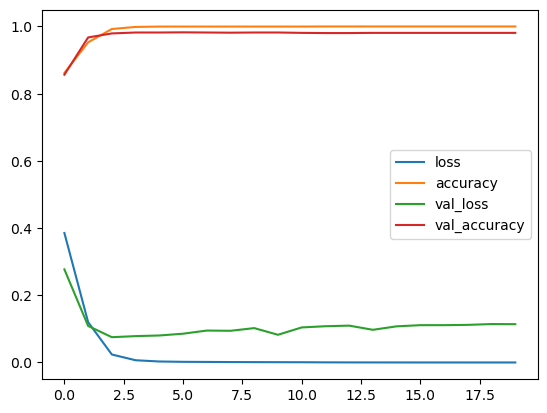

In [24]:
losses.plot()